In [44]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap

In [45]:
pendigits = sklearn.datasets.load_digits()
mnist = sklearn.datasets.fetch_openml('mnist_784')
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')


In [46]:
fmnist

{'DESCR': "**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  P

In [47]:
import umap.plot

In [48]:
mapper=umap.UMAP().fit(pendigits.data)

In [49]:
mapper

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


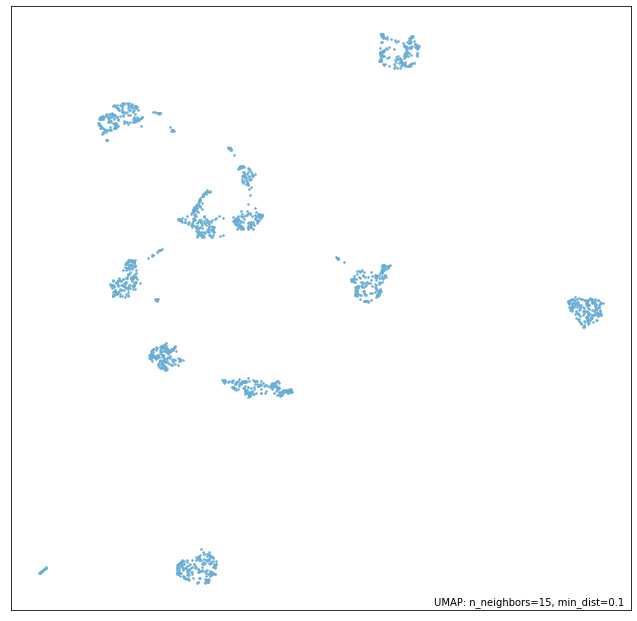

In [50]:
umap.plot.points(mapper)

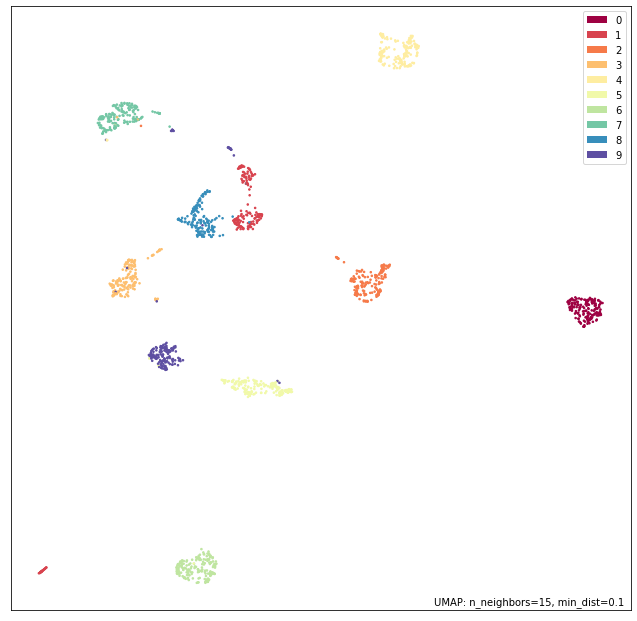

In [51]:
umap.plot.points(mapper,labels=pendigits.target)

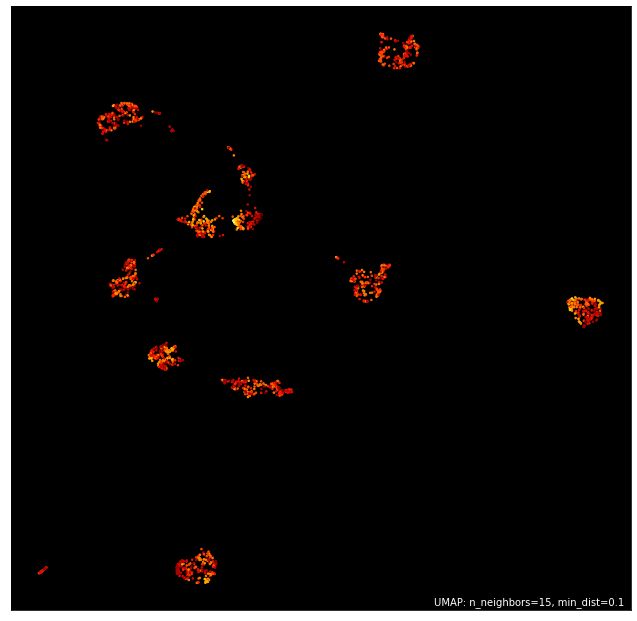

In [52]:
umap.plot.points(mapper,values=pendigits.data.mean(axis=1),theme='fire')

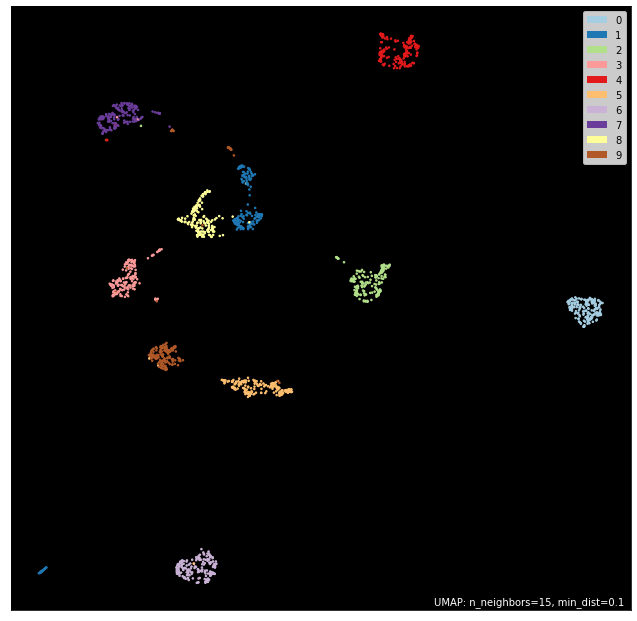

In [53]:
umap.plot.points(mapper,labels=pendigits.target,color_key_cmap="Paired",background="black")

In [69]:
mapper=umap.UMAP(n_neighbors=15).fit(fmnist.data)

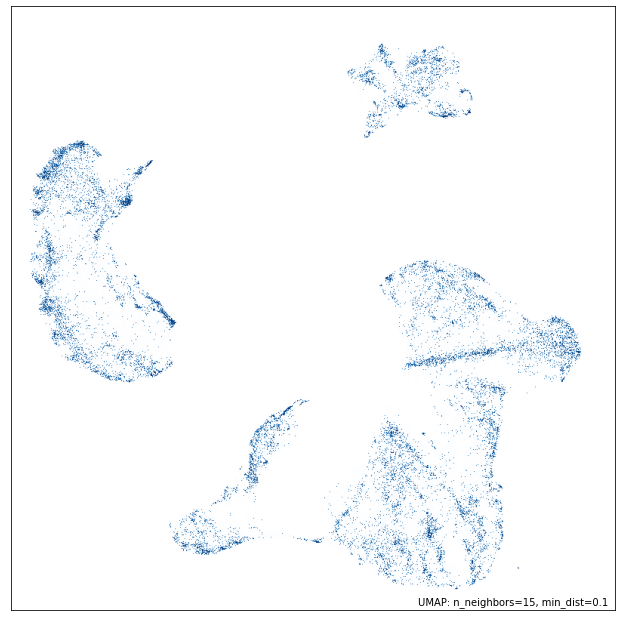

In [70]:
umap.plot.points(mapper)

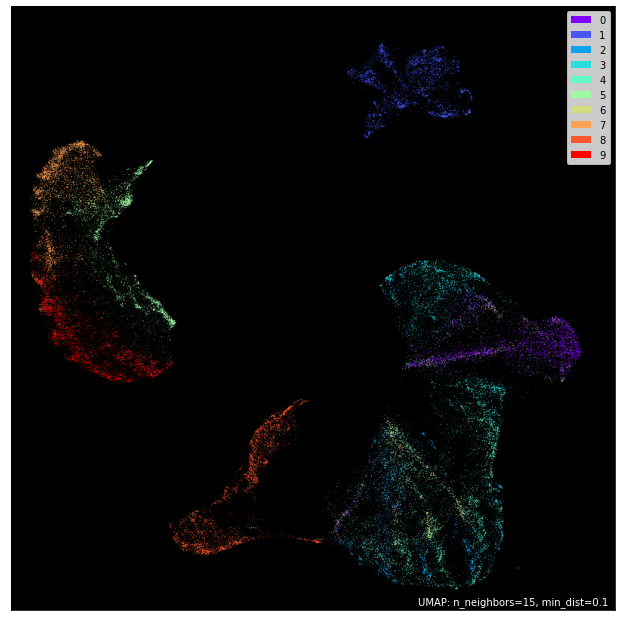

In [71]:
umap.plot.points(mapper,labels=fmnist.target,theme="fire")

In [72]:
mapper=umap.UMAP().fit(fmnist.data[:3000])

In [73]:
hover_data = pd.DataFrame({'index':np.arange(30000),
                           'label':fmnist.target[:30000]})
hover_data['item'] = hover_data.label.map(
    {
        '0':'T-shirt/top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',
    }
)

In [74]:
hover_data

,index,label,item
0,0,9,Ankle Boot
1,1,0,T-shirt/top
2,2,0,T-shirt/top
3,3,3,Dress
4,4,0,T-shirt/top
...,...,...,...
29995,29995,3,Dress
29996,29996,6,Shirt
29997,29997,7,Sneaker
29998,29998,0,T-shirt/top


In [75]:
from bokeh.io import output_notebook
output_notebook()

In [76]:
p=umap.plot.interactive(mapper,labels=fmnist.target[:3000],hover_data=hover_data,point_size=2)
umap.plot.show(p)

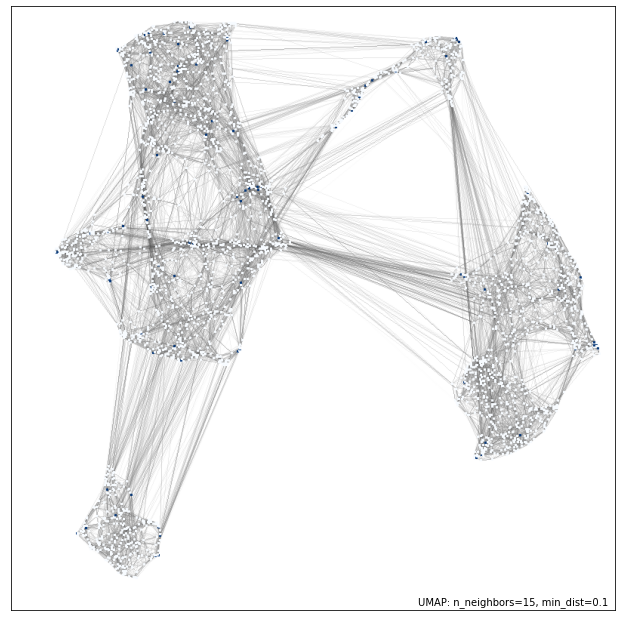

In [77]:
umap.plot.connectivity(mapper,show_points=True)

/usr/local/lib/python3.6/dist-packages/umap/plot.py:850: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


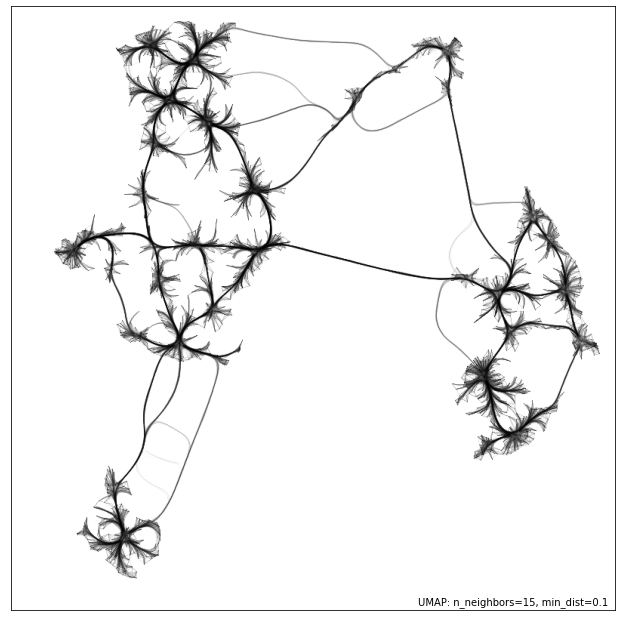

In [78]:
umap.plot.connectivity(mapper,edge_bundling='hammer')

In [80]:
mapper=umap.UMAP().fit(mnist.data)

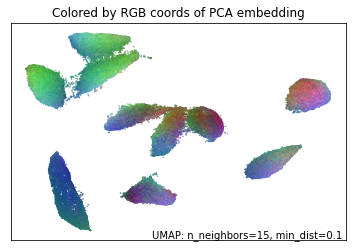

In [81]:
umap.plot.diagnostic(mapper,diagnostic_type="pca")